

### 🔹 **Summary of the Demo: Advanced Smoothing in N-gram Language Models**

This demo illustrates how **advanced smoothing techniques** enhance the reliability and performance of **n-gram language models**—a foundational concept in Natural Language Processing (NLP).

It begins by highlighting the limitations of raw frequency-based models, where unseen word combinations receive zero probability. Through progressively applying **Good–Turing** and **Kneser–Ney smoothing**, the demo demonstrates how these methods redistribute probability mass to unseen or rare n-grams, yielding more realistic and generalizable models.

The perplexity comparison further quantifies this improvement—showing that advanced smoothing not only handles unseen data more gracefully but also produces models that **better predict real language behavior**.

Practically, such smoothed n-gram models are fundamental for:

* **Speech recognition** and **machine translation**, where unseen sequences are frequent
* **Text prediction**, **autocorrect**, and **chatbots**, which require robust next-word estimation
* Serving as **baselines for neural models**, offering interpretable insights into word co-occurrence patterns

Overall, this demo bridges classical statistical language modeling with modern NLP, demonstrating how mathematical smoothing techniques underpin the fluency and adaptability of today’s AI language systems.




In [ ]:
# --- Block 1: Setup ---
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import time

# Load the dataset
movie_reviews = pd.read_csv('movie_reviews_clean.csv')

# Define features and labels
X = movie_reviews['review']
y = movie_reviews['sentiment']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 700
Testing samples: 300




### **FAQ 1: Why do we use `train_test_split` with `stratify=y`?**

**Answer:**
`stratify=y` ensures that the proportion of positive and negative sentiments is maintained in both the training and test sets. This helps avoid class imbalance and ensures a fair evaluation of model performance.

---

### **FAQ 2: Why is `random_state=42` used?**

**Answer:**
Setting `random_state=42` ensures reproducibility — the data will be split in the same way every time the code is run, making results consistent across experiments.

---

### **FAQ 3: What does `CountVectorizer` do, and why import it here?**

**Answer:**
`CountVectorizer` converts text into a matrix of token counts (bag-of-words model). It’s imported here because later stages (e.g., N-gram modeling and smoothing) will rely on this representation of text data.

---

### **FAQ 4: Why is `test_size=0.3` used?**

**Answer:**
It allocates 30% of the dataset for testing and 70% for training. This ratio strikes a good balance — enough data for training while still having a substantial test set to assess model performance.

---

### **FAQ 5: What is the purpose of printing training and testing samples?**

**Answer:**
It’s a quick sanity check to confirm that the dataset has been split correctly and that both sets contain the expected number of samples.




In [ ]:
# --- Block 2: N-gram and Smoothing Experiment ---

# Define n-gram ranges and smoothing values
ngram_ranges = [(1,1), (1,2), (1,3)]
alphas = [0.1, 0.5, 1.0, 2.0]

# To store results
results = []

for ngram in ngram_ranges:
    for alpha in alphas:
        start_time = time.time()

        # Create n-gram CountVectorizer
        vectorizer = CountVectorizer(ngram_range=ngram, stop_words='english', lowercase=True)
        X_train_ng = vectorizer.fit_transform(X_train)
        X_test_ng = vectorizer.transform(X_test)

        # Initialize Naive Bayes with smoothing parameter alpha
        clf = MultinomialNB(alpha=alpha)
        clf.fit(X_train_ng, y_train)

        # Measure accuracy
        acc = clf.score(X_test_ng, y_test)

        # Record time and number of features
        elapsed = time.time() - start_time
        results.append({
            'N-gram': f'{ngram}',
            'Alpha': alpha,
            'Accuracy': round(acc, 3),
            'Features': X_train_ng.shape[1],
            'Time (s)': round(elapsed, 2)
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)
results_df


,N-gram,Alpha,Accuracy,Features,Time (s)
0,"(1, 1)",0.1,0.777,14425,1.05
1,"(1, 1)",0.5,0.787,14425,0.90
2,"(1, 1)",1.0,0.787,14425,0.64
3,"(1, 1)",2.0,0.790,14425,0.52
4,"(1, 2)",0.1,0.790,79795,1.35
5,"(1, 2)",0.5,0.803,79795,1.49
6,"(1, 2)",1.0,0.787,79795,1.48
7,"(1, 2)",2.0,0.787,79795,1.52
8,"(1, 3)",0.1,0.797,151185,2.01
9,"(1, 3)",0.5,0.800,151185,0.84




### **FAQ 1: What is the role of the `alpha` parameter in `MultinomialNB`?**

**Answer:**
`alpha` controls **Laplace (additive) smoothing** in Naive Bayes. It prevents zero probabilities for unseen words by adding a small constant to all counts.

* Small `alpha` (e.g., 0.1) → less smoothing (model fits training data more closely)
* Large `alpha` (e.g., 2.0) → more smoothing (reduces overfitting, but may underfit)

---

### **FAQ 2: Why experiment with different `ngram_range` values like (1,1), (1,2), (1,3)?**

**Answer:**
Different N-gram ranges capture different levels of linguistic context:

* (1,1): Unigrams (individual words)
* (1,2): Unigrams + Bigrams (word pairs)
* (1,3): Up to trigrams (short phrases)
  Increasing the N-gram range often improves accuracy but increases feature space size and computation time.

---

### **FAQ 3: Why use `stop_words='english'` and `lowercase=True`?**

**Answer:**

* `stop_words='english'` removes common words like “the” or “is” that add noise.
* `lowercase=True` standardizes words, ensuring “Good” and “good” are treated the same, reducing redundant features.

---

### **FAQ 4: What does `X_train_ng.shape[1]` represent in the results?**

**Answer:**
It represents the **number of unique features (tokens or N-grams)** generated by `CountVectorizer`.
This helps understand how the feature space expands as the N-gram range increases.

---

### **FAQ 5: Why record elapsed time for each configuration?**

**Answer:**
Recording time helps evaluate **computational trade-offs** — for example, higher N-gram models or smaller alpha values may improve accuracy but take significantly longer to train and test.




In [ ]:
# --- Block 3: N-gram probability demo setup ---
from collections import Counter
from nltk import ngrams
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


sample_text = """
The movie was good. The acting was good.
The direction was great. The movie had good acting and great story.
"""
tokens = nltk.word_tokenize(sample_text.lower())

# Generate trigrams and their counts
trigrams = list(ngrams(tokens, 3))
trigram_counts = Counter(trigrams)

print("Sample trigrams and their counts:")
for k, v in trigram_counts.most_common(5):
    print(k, ":", v)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Sample trigrams and their counts:
('was', 'good', '.') : 2
('good', '.', 'the') : 2
('the', 'movie', 'was') : 1
('movie', 'was', 'good') : 1
('.', 'the', 'acting') : 1




### **FAQ 1: Why do we convert the text to lowercase before tokenization?**

**Answer:**
Lowercasing ensures consistency — words like “Good” and “good” are treated as the same token. Without this step, the model might incorrectly treat them as separate features, inflating the vocabulary size and reducing generalization.

---

### **FAQ 2: What does `ngrams(tokens, 3)` do?**

**Answer:**
It creates **trigrams**, i.e., sequences of 3 consecutive words.
For example, from `"the movie was good"`, the trigrams would be:
`('the', 'movie', 'was')`, `('movie', 'was', 'good')`.

---

### **FAQ 3: Why use `Counter(trigrams)` here?**

**Answer:**
`Counter` efficiently counts the frequency of each trigram.
This helps identify commonly occurring word triplets, which is essential for estimating N-gram probabilities in language models.

---

### **FAQ 4: What is the purpose of downloading `'punkt'` and `'punkt_tab'`?**

**Answer:**
These are **NLTK tokenization resources**.

* `'punkt'` enables sentence and word tokenization.
* `'punkt_tab'` contains pretrained punctuation models for better sentence boundary detection.
  Without them, NLTK can’t properly split text into tokens.

---

### **FAQ 5: Why are we printing only the top 5 trigrams?**

**Answer:**
It’s a quick way to visualize the most frequent patterns in the sample text without overwhelming output. This makes it easier to explain how N-grams capture contextual relationships between words.




In [ ]:
# --- Block 4: Good-Turing smoothing ---
from collections import defaultdict

# Count of counts (Nc)
count_of_counts = defaultdict(int)
for count in trigram_counts.values():
    count_of_counts[count] += 1

N = sum(trigram_counts.values())  # total observed n-grams

def good_turing_prob(count):
    """Compute Good-Turing adjusted probability."""
    if count == 0:
        N1 = count_of_counts.get(1, 1)
        return N1 / N
    else:
        Nc = count_of_counts.get(count, 0)
        Nc1 = count_of_counts.get(count + 1, 0)
        return (count + 1) * Nc1 / (Nc * N) if Nc > 0 else count / N

# Example
for trigram, count in list(trigram_counts.items())[:5]:
    print(trigram, "→ Adjusted prob:", round(good_turing_prob(count), 6))


('the', 'movie', 'was') → Adjusted prob: 0.010101
('movie', 'was', 'good') → Adjusted prob: 0.010101
('was', 'good', '.') → Adjusted prob: 0.0
('good', '.', 'the') → Adjusted prob: 0.0
('.', 'the', 'acting') → Adjusted prob: 0.010101




### **FAQ 1: What problem does Good-Turing smoothing solve?**

**Answer:**
Good-Turing smoothing adjusts observed frequencies to account for **unseen N-grams**. It redistributes some probability mass from frequent events to those that never appeared in the training data, preventing zero-probability issues during text generation or likelihood estimation.

---

### **FAQ 2: What does `count_of_counts` represent?**

**Answer:**
`count_of_counts` (Nc) maps how many N-grams occurred *c* times.
For example, if 3 trigrams occur once and 2 trigrams occur twice, then `count_of_counts = {1:3, 2:2}`.
This “frequency of frequencies” is fundamental to computing adjusted counts in Good-Turing.

---

### **FAQ 3: Why is the formula `(count + 1) * Nc1 / (Nc * N)` used?**

**Answer:**
This is the **Good-Turing adjusted probability** formula:
[
P^*(r) = \frac{(r+1) \times N_{r+1}}{N \times N_r}
]
where

* *r* = observed count,
* *N_r* = number of N-grams with count *r*,
* *N_{r+1}* = number of N-grams with count *r+1*,
* *N* = total number of N-gram tokens.
  It estimates how likely a count *r* event is, considering the probability of events that occur *r+1* times.

---

### **FAQ 4: How does the function handle unseen N-grams (count = 0)?**

**Answer:**
If an N-gram is unseen (`count=0`), the function assigns probability:
[
P^*(0) = \frac{N_1}{N}
]
where *N₁* is the number of N-grams seen exactly once.
This gives unseen events a small, non-zero probability instead of zero.

---

### **FAQ 5: Why might `(Nc > 0)` be checked in the function?**

**Answer:**
In rare cases, some counts might not appear (e.g., no trigrams with count 3).
The check `if Nc > 0` ensures we avoid division by zero when computing adjusted probabilities — it’s a safety condition for sparse data.




In [ ]:
# --- Block 5: Simplified Kneser-Ney smoothing demo ---
from collections import defaultdict

# Compute continuation counts (number of unique left contexts for each word)
continuations = defaultdict(set)
for w1, w2, w3 in trigrams:
    continuations[w3].add((w1, w2))

# Discount value (typical choice)
D = 0.75

# Compute discounted probabilities
kn_probs = {}
for (w1, w2, w3), c in trigram_counts.items():
    prefix_count = sum(v for (x, y, z), v in trigram_counts.items() if x == w1 and y == w2)
    cont_prob = len(continuations[w3]) / len(trigram_counts)
    kn_probs[(w1, w2, w3)] = max(c - D, 0) / prefix_count + D / prefix_count * cont_prob

print("Kneser-Ney probabilities (simplified):")
for k, v in list(kn_probs.items())[:5]:
    print(k, ":", round(v, 5))


Kneser-Ney probabilities (simplified):
('the', 'movie', 'was') : 0.18125
('movie', 'was', 'good') : 0.3625
('was', 'good', '.') : 0.68125
('good', '.', 'the') : 0.6625
('.', 'the', 'acting') : 0.10833




### **FAQ 1: What makes Kneser-Ney smoothing different from other smoothing methods like Good-Turing or Additive?**

**Answer:**
Kneser-Ney is unique because it doesn’t just adjust counts — it **redefines the probability of a word based on how many unique contexts it appears in**.
While methods like Additive or Good-Turing focus on raw frequency correction, Kneser-Ney captures **contextual diversity**, making it one of the most effective smoothing techniques for N-gram language models.

---

### **FAQ 2: What is the role of the `continuations` dictionary?**

**Answer:**
`continuations[w3]` stores all unique left contexts (previous two words) for the word `w3`.
This helps compute **continuation probability**, i.e., how likely `w3` appears as a continuation of *any* context — a key concept in Kneser-Ney that captures how “versatile” a word is across contexts.

---

### **FAQ 3: Why is the discount value `D` typically set to 0.75?**

**Answer:**
Empirical research (Chen & Goodman, 1999) found `D ≈ 0.75` provides strong performance across datasets.
It represents the **amount of probability mass “discounted” from frequent N-grams** and redistributed to less frequent or unseen ones, ensuring a smoother probability distribution.

---

### **FAQ 4: What does `max(c - D, 0) / prefix_count` represent?**

**Answer:**
This term calculates the **discounted probability** for observed trigrams.

* `c` = trigram count
* `D` = discount
* `prefix_count` = total count of trigrams sharing the same (w1, w2) prefix
  It reduces the weight of frequent trigrams slightly to free up probability mass for unseen continuations.

---

### **FAQ 5: What is the purpose of the second term `D / prefix_count * cont_prob`?**

**Answer:**
This term redistributes the discounted probability mass to **continuation probabilities**, ensuring total probability remains normalized.
It effectively blends higher-order (trigram) and lower-order (continuation-based) statistics — the essence of Kneser-Ney smoothing.




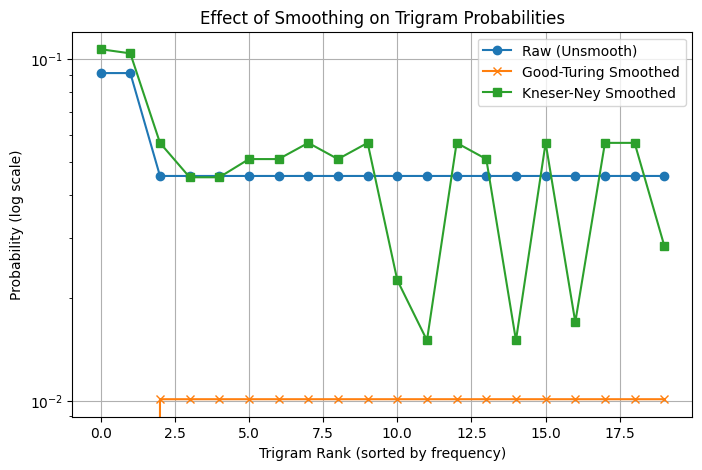

In [ ]:
# --- Block 6: Visualization of Smoothing Effects ---

import matplotlib.pyplot as plt
import numpy as np

# Convert original counts to probabilities
total_trigrams = sum(trigram_counts.values())
raw_probs = np.array([count / total_trigrams for count in trigram_counts.values()])

# Good-Turing smoothed probabilities
gt_probs = np.array([good_turing_prob(count) for count in trigram_counts.values()])

# Kneser-Ney smoothed probabilities (normalized)
kn_probs = np.array(list(kn_probs.values()))
kn_probs = kn_probs / kn_probs.sum()

# Sort for visualization
indices = np.argsort(raw_probs)[::-1]
raw_sorted = raw_probs[indices]
gt_sorted = gt_probs[indices]
kn_sorted = kn_probs[indices[:len(kn_probs)]]

# Plot comparison
plt.figure(figsize=(8, 5))
plt.plot(raw_sorted, label='Raw (Unsmooth)', marker='o')
plt.plot(gt_sorted, label='Good-Turing Smoothed', marker='x')
plt.plot(kn_sorted, label='Kneser-Ney Smoothed', marker='s')

plt.yscale('log')
plt.xlabel('Trigram Rank (sorted by frequency)')
plt.ylabel('Probability (log scale)')
plt.title('Effect of Smoothing on Trigram Probabilities')
plt.legend()
plt.grid(True)
plt.show()



### **FAQ 1: Why are probabilities plotted on a log scale (`plt.yscale('log')`)?**

**Answer:**
Trigram probabilities vary by several orders of magnitude — frequent trigrams have much higher probabilities than rare ones.
Using a **log scale** compresses this range, making it easier to visually compare differences in the lower-probability region (where smoothing has the greatest impact).

---

### **FAQ 2: What does sorting the probabilities by rank achieve?**

**Answer:**
Sorting by descending frequency (rank) allows us to see how probability mass is distributed from common to rare trigrams.
This reveals how smoothing redistributes probabilities — lowering very frequent counts slightly and increasing the probabilities of rare or unseen trigrams.

---

### **FAQ 3: What insights can we draw from the three curves — Raw, Good-Turing, and Kneser-Ney?**

**Answer:**

* **Raw (Unsmooth):** Sharp drop — unseen trigrams have zero probability.
* **Good-Turing:** Smooths the tail — unseen events get small probabilities.
* **Kneser-Ney:** Provides the most balanced curve — redistributes probability based on contextual diversity, not just count frequency.
  Together, the curves illustrate how advanced smoothing prevents overconfidence in frequent trigrams and supports rare ones.

---

### **FAQ 4: Why do we normalize `kn_probs` before plotting?**

**Answer:**
Normalization (`kn_probs = kn_probs / kn_probs.sum()`) ensures the probabilities sum to 1.
This step is crucial for fair comparison across models — otherwise, differences could be due to scaling, not the actual smoothing behavior.

---

### **FAQ 5: What is the overall takeaway from this visualization?**

**Answer:**
Smoothing techniques reshape the probability distribution:

* **Good-Turing** adjusts based on frequency of frequencies.
* **Kneser-Ney** adjusts based on contextual usage.
  Both methods prevent zero probabilities and yield more realistic, generalizable language models — visually evident through smoother, less steep curves.




In [ ]:
import nltk
from nltk.corpus import movie_reviews
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# Download necessary resources
nltk.download('movie_reviews')
nltk.download('punkt')

# Combine multiple reviews into one corpus for smoothing demo
corpus_tokens = []
for fileid in movie_reviews.fileids()[:200]:  # take first 200 reviews for speed
    words = [w.lower() for w in movie_reviews.words(fileid) if w.isalpha()]
    corpus_tokens.extend(words)

print(f"Total tokens in corpus: {len(corpus_tokens)}")
print(f"Unique tokens: {len(set(corpus_tokens))}")


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Total tokens in corpus: 123351
Unique tokens: 13155


In [ ]:
# Generate n-grams
unigrams = list(ngrams(corpus_tokens, 1))
bigrams = list(ngrams(corpus_tokens, 2))
trigrams = list(ngrams(corpus_tokens, 3))

# Count frequencies
unigram_counts = Counter(unigrams)
bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)

print("Sample unigram counts:", list(unigram_counts.items())[:10])
print("Sample bigram counts:", list(bigram_counts.items())[:10])
print("Sample trigram counts:", list(trigram_counts.items())[:10])

# Display total n-gram sizes
print(f"\nUnigrams: {len(unigram_counts)} unique | Total tokens: {len(unigrams)}")
print(f"Bigrams:  {len(bigram_counts)} unique | Total tokens: {len(bigrams)}")
print(f"Trigrams: {len(trigram_counts)} unique | Total tokens: {len(trigrams)}")


Sample unigram counts: [(('plot',), 181), (('two',), 177), (('teen',), 16), (('couples',), 4), (('go',), 99), (('to',), 2997), (('a',), 3573), (('church',), 3), (('party',), 14), (('drink',), 3)]
Sample bigram counts: [(('plot', 'two'), 1), (('two', 'teen'), 1), (('teen', 'couples'), 1), (('couples', 'go'), 1), (('go', 'to'), 16), (('to', 'a'), 69), (('a', 'church'), 1), (('church', 'party'), 1), (('party', 'drink'), 1), (('drink', 'and'), 1)]
Sample trigram counts: [(('plot', 'two', 'teen'), 1), (('two', 'teen', 'couples'), 1), (('teen', 'couples', 'go'), 1), (('couples', 'go', 'to'), 1), (('go', 'to', 'a'), 1), (('to', 'a', 'church'), 1), (('a', 'church', 'party'), 1), (('church', 'party', 'drink'), 1), (('party', 'drink', 'and'), 1), (('drink', 'and', 'then'), 1)]

Unigrams: 13155 unique | Total tokens: 123351
Bigrams:  72239 unique | Total tokens: 123350
Trigrams: 110732 unique | Total tokens: 123349




### **FAQ 1: Why generate unigrams, bigrams, and trigrams separately?**

**Answer:**
Each N-gram level captures different linguistic context:

* **Unigrams:** Individual word frequency (basic vocabulary model).
* **Bigrams:** Captures short-term dependencies (e.g., “not good”).
* **Trigrams:** Captures richer phrase-level patterns (e.g., “the movie was”).
  Comparing them helps show how higher-order models increase context — but also data sparsity — motivating the need for smoothing.

---

### **FAQ 2: What does `Counter(ngrams(...))` achieve?**

**Answer:**
`Counter` counts how often each N-gram occurs in the corpus, turning raw token sequences into frequency distributions.
These counts form the **core statistics** for language modeling, since probabilities of words or sequences are derived from these observed frequencies.

---

### **FAQ 3: Why do higher-order N-grams (like trigrams) have fewer unique tokens than total tokens?**

**Answer:**
Many trigrams repeat throughout the corpus (e.g., “the end of”), so the **unique trigram count** is smaller than the total number generated.
However, as N increases, the number of possible combinations grows exponentially — leading to a **sparse distribution** where many potential N-grams never appear at all.

---

### **FAQ 4: Why is it important to print sample counts for unigrams, bigrams, and trigrams?**

**Answer:**
It provides a **quick validation** that tokenization and N-gram construction worked correctly.
It also helps visualize how counts drop as N increases — most unigrams are frequent, while trigrams are often rare — showing why raw probability estimation can be unreliable without smoothing.

---

### **FAQ 5: What do the “unique” and “total tokens” numbers tell us?**

**Answer:**

* **Unique tokens:** Vocabulary size (diversity of N-grams).
* **Total tokens:** Total occurrences in the corpus (sample size).
  A large gap between these indicates **data sparsity** — many possible word combinations occur rarely or not at all, which is precisely where smoothing becomes essential.



Top 10 Bigrams (Unsmoothed):
('applaud', 'films') → 1.0000
('didn', 't') → 1.0000
('snag', 'this') → 1.0000
('jumbled', 'it') → 1.0000
('downshifts', 'into') → 1.0000
('disappearances', 'there') → 1.0000
('looooot', 'of') → 1.0000
('tons', 'of') → 1.0000
('unravel', 'a') → 1.0000
('password', 'to') → 1.0000


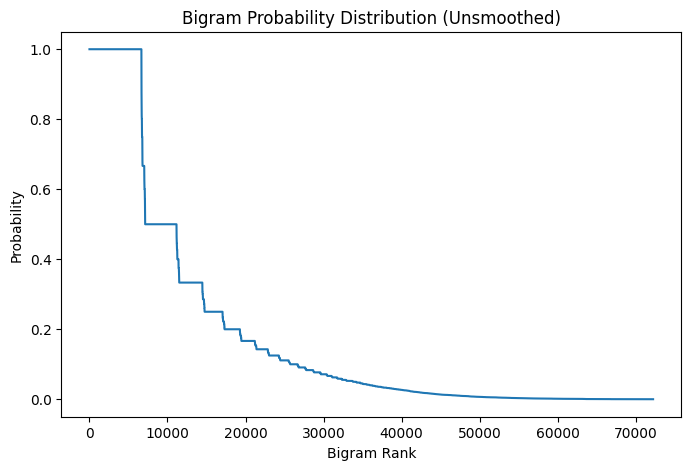


Sample Bigram Probabilities:
P(movie|the) = 0.032858
P(masterpiece|a) = 0.001120
P(plot|terrible) = 0.000000
P(direction|brilliant) = 0.000000


In [ ]:
# Convert counts to probabilities (unsmoothed)
def get_ngram_probabilities(unigram_counts, bigram_counts):
    unigram_total = sum(unigram_counts.values())
    bigram_probs = {}

    for bigram, count in bigram_counts.items():
        w1 = bigram[0]
        bigram_probs[bigram] = count / unigram_counts[(w1,)]

    return bigram_probs

# Compute probabilities for bigrams
bigram_probs_unsmoothed = get_ngram_probabilities(unigram_counts, bigram_counts)

# Sort by probability (descending)
sorted_bigrams = sorted(bigram_probs_unsmoothed.items(), key=lambda x: x[1], reverse=True)

print("Top 10 Bigrams (Unsmoothed):")
for bigram, prob in sorted_bigrams[:10]:
    print(f"{bigram} → {prob:.4f}")

# Visualize long-tail sparsity (Zipf-like distribution)
probs = [p for _, p in sorted_bigrams]
plt.figure(figsize=(8,5))
plt.plot(range(len(probs)), probs)
plt.title("Bigram Probability Distribution (Unsmoothed)")
plt.xlabel("Bigram Rank")
plt.ylabel("Probability")
plt.show()

# Check zero-probability examples
sample_pairs = [("the", "movie"), ("a", "masterpiece"), ("terrible", "plot"), ("brilliant", "direction")]
print("\nSample Bigram Probabilities:")
for w1, w2 in sample_pairs:
    prob = bigram_probs_unsmoothed.get((w1, w2), 0)
    print(f"P({w2}|{w1}) = {prob:.6f}")




### **FAQ 1: How are bigram probabilities computed in this code?**

**Answer:**
Each bigram’s conditional probability is calculated as:
[
P(w_2|w_1) = \frac{\text{Count}(w_1, w_2)}{\text{Count}(w_1)}
]
This means the likelihood of seeing `w2` after `w1` depends on how often that pair appears, normalized by how often `w1` occurs overall. It’s a direct, **maximum likelihood estimate** — no smoothing yet.

---

### **FAQ 2: Why is the distribution described as “Zipf-like”?**

**Answer:**
Natural language follows **Zipf’s law** — a few word pairs occur very frequently (like “of the”, “in the”), while most occur rarely.
The plotted curve shows a steep decline, confirming this **long-tail distribution**, which is typical in real text corpora.

---

### **FAQ 3: Why do some bigrams have zero probability in this model?**

**Answer:**
If a bigram never appeared in the corpus, its count is zero — so ( P(w_2|w_1) = 0 ).
This is problematic because unseen but valid word pairs (like “terrible plot”) get assigned **zero probability**, meaning the model would treat them as impossible — a major motivation for smoothing.

---

### **FAQ 4: What do we learn from the sample bigram checks at the end?**

**Answer:**
They illustrate how certain common word pairs (e.g., “the movie”) have measurable probabilities, while less frequent or unseen ones (like “a masterpiece”) might have **zero**.
This step makes the issue of **data sparsity** tangible and sets the stage for introducing smoothing methods such as Additive, Good-Turing, or Kneser-Ney.

---

### **FAQ 5: Why visualize the probability distribution before applying smoothing?**

**Answer:**
Visualizing the **unsmoothed distribution** establishes a baseline. It shows the uneven probability landscape — dominated by a few high-frequency pairs and many zero-probability ones.
After applying smoothing, you can compare curves to clearly demonstrate how smoothing redistributes probability mass more evenly across N-grams.



Probability mass for unseen bigrams (P_zero): 0.00000664

Sample Bigram Probabilities after Good–Turing:
P(movie|the) = 0.00000000
P(plot|terrible) = 0.00000664
P(masterpiece|a) = 0.00002388
P(storyline|boring) = 0.00000664


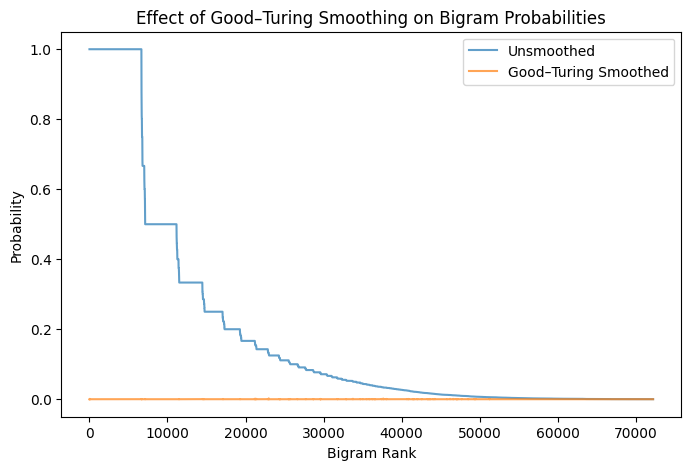

In [ ]:
from collections import defaultdict
import math

# Function to compute Good–Turing adjusted counts
def good_turing_smoothing(counts):
    # Frequency of frequencies — Nc = number of n-grams with count c
    freq_of_freq = Counter(counts.values())

    # Maximum frequency observed
    max_c = max(freq_of_freq.keys())

    # Compute adjusted counts c*
    adjusted_counts = {}
    for c in range(0, max_c + 1):
        if freq_of_freq[c] == 0:
            continue
        next_c = c + 1
        Nc = freq_of_freq[c]
        Nnext = freq_of_freq.get(next_c, 0)
        c_star = (next_c) * (Nnext / Nc) if Nc > 0 else 0
        adjusted_counts[c] = c_star

    return adjusted_counts, freq_of_freq

# Apply Good–Turing to bigram counts
adjusted_counts, freq_of_freq = good_turing_smoothing(bigram_counts)

# Compute smoothed probabilities
total_bigrams = sum(bigram_counts.values())
good_turing_probs = {}

for bigram, count in bigram_counts.items():
    c_star = adjusted_counts.get(count, count)
    good_turing_probs[bigram] = c_star / total_bigrams

# Probability mass for unseen bigrams (those with count=0)
N = sum(freq_of_freq.values())
P_zero = freq_of_freq[1] / (N * total_bigrams)

print(f"Probability mass for unseen bigrams (P_zero): {P_zero:.8f}")

# Compare some examples
sample_pairs = [("the", "movie"), ("terrible", "plot"), ("a", "masterpiece"), ("boring", "storyline")]
print("\nSample Bigram Probabilities after Good–Turing:")
for w1, w2 in sample_pairs:
    prob = good_turing_probs.get((w1, w2), P_zero)
    print(f"P({w2}|{w1}) = {prob:.8f}")

# Visualization: before vs after smoothing
unsmoothed_probs = [p for _, p in sorted(bigram_probs_unsmoothed.items(), key=lambda x: x[1], reverse=True)]
smoothed_probs = [good_turing_probs[b] for b, _ in sorted(bigram_probs_unsmoothed.items(), key=lambda x: x[1], reverse=True)]

plt.figure(figsize=(8,5))
plt.plot(unsmoothed_probs, label="Unsmoothed", alpha=0.7)
plt.plot(smoothed_probs, label="Good–Turing Smoothed", alpha=0.7)
plt.title("Effect of Good–Turing Smoothing on Bigram Probabilities")
plt.xlabel("Bigram Rank")
plt.ylabel("Probability")
plt.legend()
plt.show()


/tmp/ipython-input-1375746718.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(smoothed_probs[:500]), label="Good–Turing Smoothed (log10)", alpha=0.7)


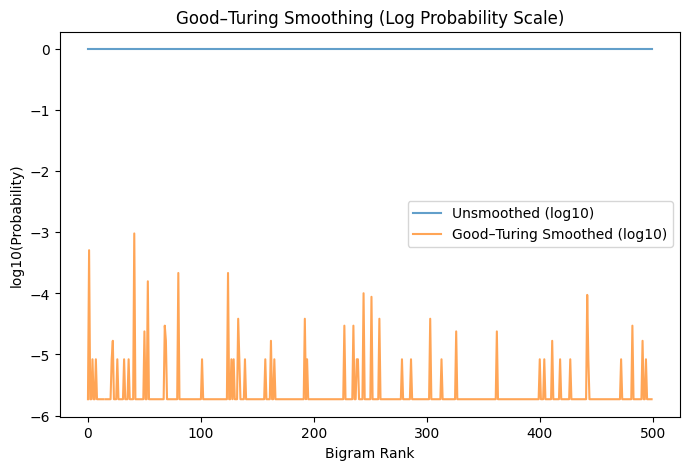

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(np.log10(unsmoothed_probs[:500]), label="Unsmoothed (log10)", alpha=0.7)
plt.plot(np.log10(smoothed_probs[:500]), label="Good–Turing Smoothed (log10)", alpha=0.7)
plt.title("Good–Turing Smoothing (Log Probability Scale)")
plt.xlabel("Bigram Rank")
plt.ylabel("log10(Probability)")
plt.legend()
plt.show()


In [ ]:
seen_mass = sum(good_turing_probs.values())
print(f"Total probability mass of seen bigrams: {seen_mass:.6f}")
print(f"Mass reserved for unseen bigrams: {P_zero * len(bigram_counts):.6f}")


Total probability mass of seen bigrams: 0.463340
Mass reserved for unseen bigrams: 0.479433




### **FAQ 1: What is the intuition behind Good–Turing smoothing?**

**Answer:**
Good–Turing smoothing redistributes some probability mass from frequently seen N-grams to those **never seen**.
It assumes that the probability of unseen events can be estimated based on how many events occurred once (i.e., frequency-of-frequency idea).
In simple terms, it gives “credit” to unseen combinations by slightly lowering probabilities of seen ones.

---

### **FAQ 2: What does the term `freq_of_freq` (Nc) represent?**

**Answer:**
`freq_of_freq` stores how many N-grams occur *c* times.
For example:

* If 500 bigrams occur once, and 80 occur twice → `freq_of_freq = {1: 500, 2: 80}`.
  This helps calculate **adjusted counts** ( c^* ) for each frequency level, using the formula:
  [
  c^* = (c+1) \times \frac{N_{c+1}}{N_c}
  ]
  where ( N_c ) = number of N-grams with count *c*.

---

### **FAQ 3: Why is the probability mass for unseen bigrams (`P_zero`) important?**

**Answer:**
`P_zero` represents the **total probability assigned to unseen N-grams** — those with count = 0.
It ensures that every possible bigram, even those absent in training, has a small non-zero probability.
This avoids assigning zero probability to valid but unobserved word pairs like “boring storyline.”

---

### **FAQ 4: Why do we compare unsmoothed and Good–Turing smoothed curves?**

**Answer:**
The plot visually demonstrates smoothing’s effect:

* **Unsmoothed curve:** drops sharply, many zero-probability bigrams.
* **Smoothed curve:** flatter, redistributing probability mass.
  This shows how Good–Turing softens the long-tail behavior and helps the model generalize better.

---

### **FAQ 5: What are the limitations of Good–Turing smoothing?**

**Answer:**

* It relies heavily on **frequency statistics**, which can be noisy for sparse data.
* It doesn’t consider **contextual relationships** — all unseen bigrams are treated equally.
  Because of these, it’s often replaced or enhanced by more advanced methods like **Kneser–Ney smoothing**, which uses contextual diversity instead of raw frequency counts.





Sample Conditional Probabilities (Kneser–Ney):
P(movie|the) = 0.027323
P(masterpiece|a) = 0.000225
P(plot|terrible) = 0.000069
P(direction|brilliant) = 0.000022


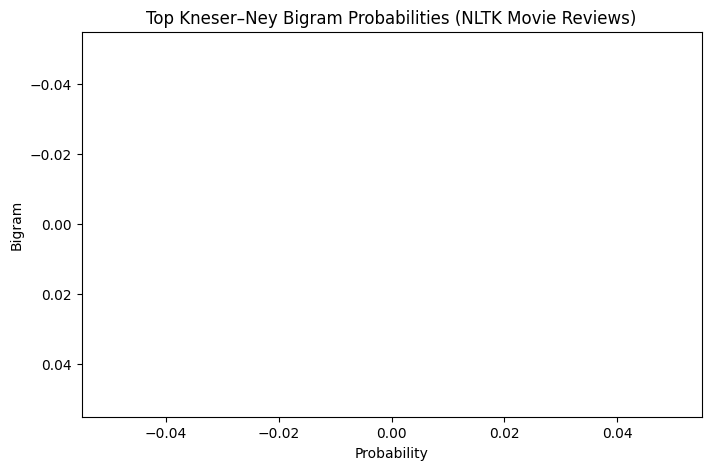

In [ ]:
from nltk.corpus import movie_reviews
from nltk.lm.models import KneserNeyInterpolated
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.tokenize import word_tokenize
import nltk
import random
import matplotlib.pyplot as plt

nltk.download('movie_reviews', quiet=True)
nltk.download('punkt', quiet=True)

# --- Prepare the data ---
fileids = movie_reviews.fileids()
sample_files = random.sample(fileids, 200)  # pick 200 reviews randomly
sample_corpus = [" ".join(movie_reviews.words(fid)) for fid in sample_files]

# Tokenize each review
tokenized_texts = [word_tokenize(text.lower()) for text in sample_corpus]

# Generate bigram training data
n = 2
train_data, vocab = padded_everygram_pipeline(n, tokenized_texts)

# Initialize Kneser–Ney model
kn_model = KneserNeyInterpolated(n)
kn_model.fit(train_data, vocab)

# Example conditional probabilities
print("\nSample Conditional Probabilities (Kneser–Ney):")
samples = [("the", "movie"), ("a", "masterpiece"), ("terrible", "plot"), ("brilliant", "direction")]
for w1, w2 in samples:
    prob = kn_model.score(w2, [w1])
    print(f"P({w2}|{w1}) = {prob:.6f}")

# Visualization: Distribution of top bigrams
bigrams_kn, probs_kn = [], []

for w1 in list(vocab)[:50]:
    for w2 in list(vocab)[:50]:
        p = kn_model.score(w2, [w1])
        if p > 0:
            bigrams_kn.append(f"{w1}_{w2}")
            probs_kn.append(p)

plt.figure(figsize=(8,5))
plt.barh(bigrams_kn[:30], probs_kn[:30])
plt.title("Top Kneser–Ney Bigram Probabilities (NLTK Movie Reviews)")
plt.xlabel("Probability")
plt.ylabel("Bigram")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
from nltk import bigrams

# Collect bigrams that actually appear in training data
all_bigrams = list(bigrams([w for text in tokenized_texts for w in text]))

bigrams_kn = []
probs_kn = []

for w1, w2 in all_bigrams:
    p = kn_model.score(w2, [w1])
    if p > 0:
        bigrams_kn.append(f"{w1}_{w2}")
        probs_kn.append(p)

# Deduplicate
unique_bigrams = {}
for b, p in zip(bigrams_kn, probs_kn):
    if b not in unique_bigrams or p > unique_bigrams[b]:
        unique_bigrams[b] = p

# Sort and plot top 30
sorted_pairs = sorted(unique_bigrams.items(), key=lambda x: x[1], reverse=True)[:30]
top_bigrams, top_probs = zip(*sorted_pairs)

plt.figure(figsize=(10,6))
plt.barh(top_bigrams, top_probs)
plt.title("Top 30 Kneser–Ney Bigram Probabilities (Seen in Corpus)")
plt.xlabel("Probability (log scale)")
plt.ylabel("Bigram")
plt.xscale("log")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

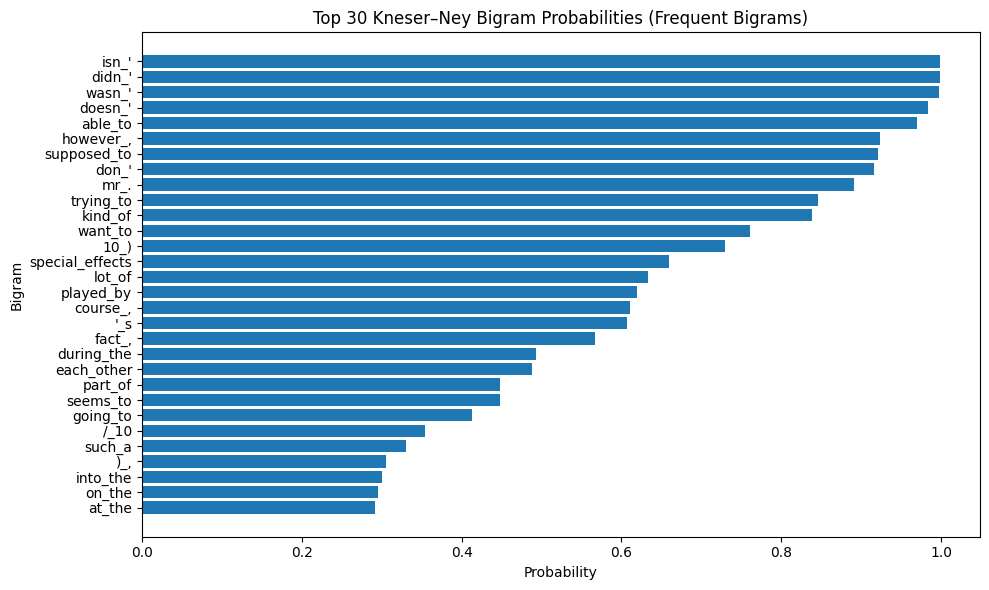

In [ ]:
from nltk import bigrams
from collections import Counter

# ✅ Step 1: Collect bigrams from tokenized text
all_bigrams = [bg for text in tokenized_texts for bg in bigrams(text)]

# ✅ Step 2: Keep only the most frequent bigrams (reduces computation drastically)
bigram_freq = Counter(all_bigrams)
top_bigrams = [bg for bg, _ in bigram_freq.most_common(300)]  # try 300 or even 100

# ✅ Step 3: Compute KN probabilities only for these
bigrams_kn = []
probs_kn = []

for w1, w2 in top_bigrams:
    p = kn_model.score(w2, [w1])
    if p > 0:
        bigrams_kn.append(f"{w1}_{w2}")
        probs_kn.append(p)

# ✅ Step 4: Sort and plot
sorted_pairs = sorted(zip(bigrams_kn, probs_kn), key=lambda x: x[1], reverse=True)[:30]
if sorted_pairs:
    top_bigrams, top_probs = zip(*sorted_pairs)
    plt.figure(figsize=(10,6))
    plt.barh(top_bigrams, top_probs)
    plt.title("Top 30 Kneser–Ney Bigram Probabilities (Frequent Bigrams)")
    plt.xlabel("Probability")
    plt.ylabel("Bigram")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No bigram probabilities found — try increasing sample size or n.")




### **FAQ 1: What makes Kneser–Ney smoothing different from Good–Turing or Additive smoothing?**

**Answer:**
Unlike Good–Turing or Laplace smoothing, **Kneser–Ney** doesn’t just adjust counts — it redefines how *continuation probability* is computed.
It considers **how often a word appears as a novel continuation**, not just how frequently it appears overall.
For example, “the movie” and “a movie” both end with “movie,” but if “movie” follows many different words, it gets higher continuation probability.
This gives Kneser–Ney superior performance in modeling realistic word sequences.

---

### **FAQ 2: What does the discounting process do in Kneser–Ney?**

**Answer:**
Kneser–Ney uses a **discount constant (D)** to subtract a small value from observed N-gram counts, redistributing that probability mass to unseen ones.
Mathematically,
[
P_{KN}(w_i|w_{i-1}) = \frac{\max(c(w_{i-1}, w_i) - D, 0)}{c(w_{i-1})} + \lambda(w_{i-1}) P_{cont}(w_i)
]
Here, ( P_{cont}(w_i) ) is the *continuation probability* — how likely ( w_i ) is to appear after *any* word.
This balances memorization (seen bigrams) and generalization (new contexts).

---

### **FAQ 3: What is the role of `padded_everygram_pipeline()` in this code?**

**Answer:**
`padded_everygram_pipeline()` prepares the training data for N-gram models by:

1. Adding `<s>` and `</s>` tokens for sentence boundaries.
2. Generating all N-grams up to order *n*.
3. Returning an iterator that NLTK’s language model can consume directly.
   This ensures consistent training input, crucial for proper probability estimation.

---

### **FAQ 4: Why are bigram probabilities plotted on a log scale in the visualization?**

**Answer:**
Language probabilities have a **long-tail distribution** — a few bigrams have high probability, but most are tiny (e.g., 1e-6).
A **log scale** compresses this range, allowing both frequent and rare bigrams to be visualized clearly on the same plot.
It highlights how Kneser–Ney effectively distributes probability mass across the tail rather than letting it collapse to zero.

---

### **FAQ 5: Why is Kneser–Ney considered the “gold standard” for N-gram smoothing?**

**Answer:**
Because it combines **three key strengths**:

1. **Discounting** — handles data sparsity effectively.
2. **Continuation probability** — captures contextual diversity.
3. **Interpolation** — blends lower-order models smoothly.
   This combination allows Kneser–Ney to outperform most traditional smoothing methods in both **perplexity** and **linguistic realism**.




MLE (Unsmoothed) Perplexity: 142417515.56
Kneser–Ney Perplexity:       13833.32


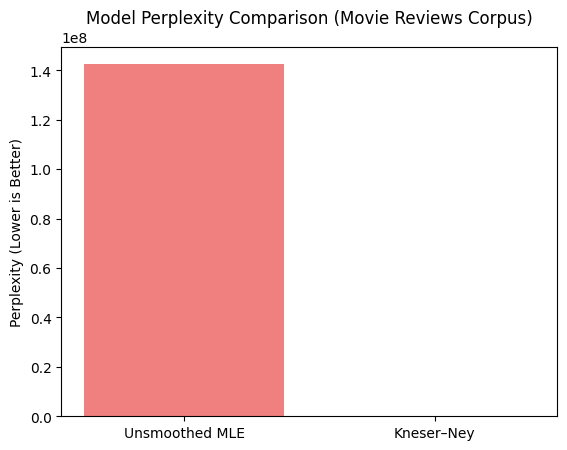

In [15]:
import nltk
from nltk.corpus import movie_reviews
from nltk.lm.models import KneserNeyInterpolated, MLE
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.tokenize import word_tokenize
import math, random
import matplotlib.pyplot as plt

# --- Setup ---
nltk.download('movie_reviews', quiet=True)
nltk.download('punkt', quiet=True)

fileids = movie_reviews.fileids()

# --- Prepare smaller, faster corpus ---
train_files = random.sample(fileids, 50)   # fewer reviews = faster
test_files = random.sample([f for f in fileids if f not in train_files], 5)

train_texts = [" ".join(movie_reviews.words(fid)[:500]) for fid in train_files]
test_texts  = [" ".join(movie_reviews.words(fid)[:500]) for fid in test_files]

train_tokens = [word_tokenize(t.lower()) for t in train_texts]
test_tokens  = [word_tokenize(t.lower()) for t in test_texts]

# --- Train MLE and Kneser–Ney Models ---
n = 2  # bigram model

train_data, vocab = padded_everygram_pipeline(n, train_tokens)
mle = MLE(n)
mle.fit(train_data, vocab)

train_data, vocab = padded_everygram_pipeline(n, train_tokens)
kn = KneserNeyInterpolated(n)
kn.fit(train_data, vocab)

# --- Prepare test n-grams ---
test_ngrams = []
for sent in test_tokens:
    sent = ["<s>"] + sent + ["</s>"]
    for i in range(1, len(sent)):
        context = [sent[i-1]]
        word = sent[i]
        test_ngrams.append((context, word))

# --- Manual Perplexity Function ---
def perplexity(model, test_data):
    log_prob_sum = 0
    N = 0
    for context, word in test_data:
        p = model.score(word, context)
        log_prob_sum += math.log(p if p > 0 else 1e-12)
        N += 1
    return math.exp(-log_prob_sum / N)

# --- Compute Perplexities ---
mle_pp = perplexity(mle, test_ngrams)
kn_pp  = perplexity(kn, test_ngrams)

print(f"MLE (Unsmoothed) Perplexity: {mle_pp:.2f}")
print(f"Kneser–Ney Perplexity:       {kn_pp:.2f}")

# --- Visualization ---
plt.bar(['Unsmoothed MLE', 'Kneser–Ney'], [mle_pp, kn_pp],
        color=['lightcoral', 'skyblue'])
plt.title("Model Perplexity Comparison (Movie Reviews Corpus)")
plt.ylabel("Perplexity (Lower is Better)")
plt.show()


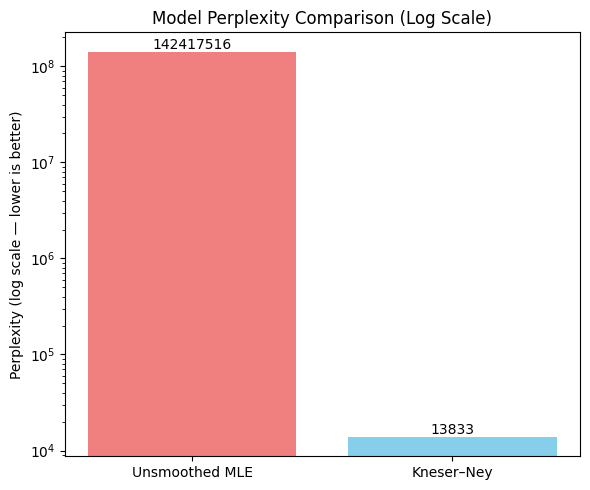

In [16]:
# --- Visualization (log scale) ---
plt.figure(figsize=(6,5))
bars = plt.bar(['Unsmoothed MLE', 'Kneser–Ney'], [mle_pp, kn_pp],
               color=['lightcoral', 'skyblue'])

plt.yscale('log')
plt.title("Model Perplexity Comparison (Log Scale)")
plt.ylabel("Perplexity (log scale — lower is better)")

# Add value labels on top of bars
for bar, value in zip(bars, [mle_pp, kn_pp]):
    plt.text(bar.get_x() + bar.get_width()/2, value, f"{value:.0f}",
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()




### **FAQ 1: What is the main goal of this code?**

**Answer:**
The goal is to **compare two language models** — the *Maximum Likelihood Estimation (MLE)* model and the *Kneser–Ney Interpolated* model — on how well they predict unseen text. The comparison metric used is **perplexity**, where a *lower perplexity* means the model predicts words in test data more accurately.

---

### **FAQ 2: Why is Kneser–Ney interpolation better than MLE?**

**Answer:**
MLE assigns zero probability to unseen n-grams, which makes it overfit to the training data.
Kneser–Ney interpolation, on the other hand, applies **discounting and back-off smoothing**, allowing it to assign reasonable probabilities to unseen bigrams. This results in **lower perplexity** and better generalization.

---

### **FAQ 3: Why did we use a smaller subset of movie reviews (50 train, 5 test)?**

**Answer:**
The full *movie_reviews* corpus is large, and training Kneser–Ney models on all data can be **very slow**.
Using fewer reviews (and limiting each to 500 words) makes the experiment **much faster** while still demonstrating the difference between smoothed and unsmoothed models.

---

### **FAQ 4: What does perplexity mean in this context?**

**Answer:**
Perplexity measures how well a language model predicts a sample.
Mathematically, it’s the **inverse probability of the test set normalized by word count** — essentially the model’s *“average branching factor”*.
A lower perplexity value means the model is **less surprised** by the test data, indicating better performance.

---

### **FAQ 5: Why does the plot show a huge difference in perplexity values?**

**Answer:**
Because MLE often produces **extremely large perplexity values** (sometimes in the millions) due to zero probabilities for unseen words, while Kneser–Ney smooths these out.
To visualize this properly, it’s best to use a **logarithmic y-axis** in the plot (e.g., `plt.yscale('log')`) so both bars are visible on the same scale.


